   Unnamed: 0  ArticleId                                               Text  \
0           0       1833  worldcom ex-boss launches defence lawyers defe...   
1           1        154  german business confidence slides german busin...   
2           2       1101  bbc poll indicates economic gloom citizens in ...   
3           3       1976  lifestyle  governs mobile choice  faster  bett...   
4           4        917  enron bosses in $168m payout eighteen former e...   

   Category  News_length                                        Text_parsed  \
0  business         1866  worldcom exboss launches defence lawyers defen...   
1  business         2016  german business confidence slides german busin...   
2  business         3104  bbc poll indicates economic gloom citizens maj...   
3      tech         3618  lifestyle governs mobile choice faster better ...   
4  business         2190  enron bosses 168m payout eighteen former enron...   

   Category_target  
0                0  
1       

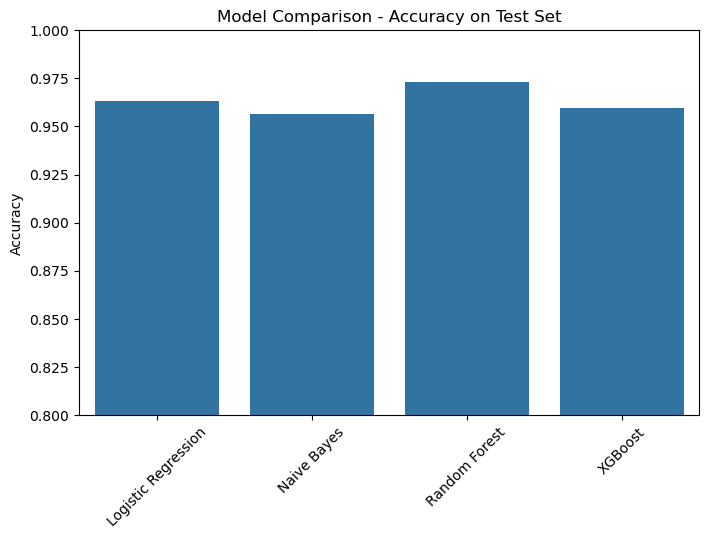

🏆 Best Model: Random Forest with Accuracy: 0.9732


In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import LabelEncoder  
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the data
df = pd.read_csv("BBC_News_processed.csv")
print(df.head())
print(df['Category'].value_counts())

# Step 3: Text Preprocessing and Feature Engineering
X = df['Text']
y = df['Category']

# Convert string labels to numerical labels
# This is the key fix for the XGBoost error
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = tfidf.fit_transform(X)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Step 6: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Step 7: Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    # Convert numerical predictions back to original labels for the report
    report = classification_report(y_test, preds, output_dict=True, 
                                  target_names=label_encoder.classes_)
    
    results[name] = {
        'accuracy': acc,
        'report': report
    }
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds, target_names=label_encoder.classes_))

# Step 8: Plot accuracy comparison
accuracies = [results[m]['accuracy'] for m in models]
model_names = list(models.keys())

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy on Test Set")
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.show()

# Step 9: Best Model Conclusion
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"🏆 Best Model: {best_model[0]} with Accuracy: {best_model[1]['accuracy']:.4f}")